<center><h2> Mott and Rutherford Scattering</h2></center>
<p>
The Mott cross section accounts for relativity    in the scattering of unnpolarized electrons by nuclei. This program compares it to the classical  Rutherford scattering cross section: 

$$
\frac{d\sigma}{d\Omega}_{\rm Mott}  =  \frac{d\sigma}{d\Omega}_{\rm Rut} ( 1-\beta^2 \sin^2(\theta/2)), \quad \beta =  v/c, \\
\frac{d\sigma}{d\Omega}_{\rm Rut} =  \Bigl ( \frac{Zze^2}{2\mu v^2}\Bigr)^2 \frac{1}{\sin^4 (\theta/2)}
$$

<IPython.core.display.Javascript object>


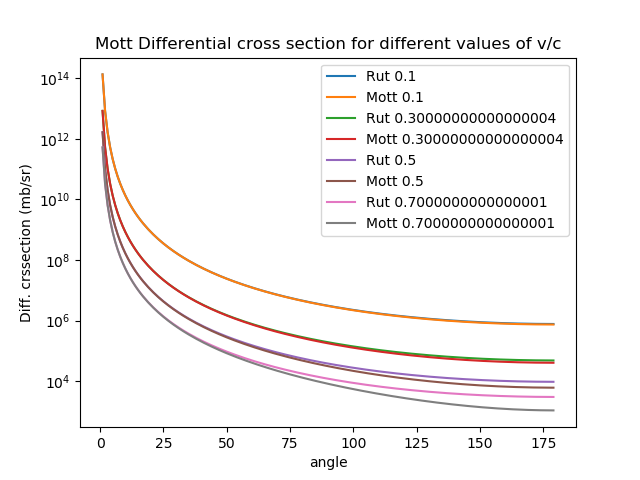

In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

#  MottScatt.ipynb: Mott and Rutherford scattering cross section computation

% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from math import *

difr = np.zeros((10,180),float) # rutherford diff cr sec
difm = np.zeros((10,180),float) # mott diff cr sec
hbarc = 197.33 
zeb = 79              #target nucleus (gold)
zep = 1                # electron
tmas =  196.966569     # gold ma
pmas =  0.000548597        # electron mass in u
redmas = pmas*tmas*931.494/(pmas+tmas) # reduced mass in Mev

def eta(beta):   # e**2/hbarc =  1/137, hbar c =  197.33 MeV-fm
   etaco = zep*zeb*197.33/(redmas*2*137.*beta**2) # eta
   return etaco
   
def diffcr(etaco,ang,beta):  
        radi = ang*pi/180. 
        sinradi = sin(radi/2.0)
        term1 = etaco/(sinradi**2)
        sigm = 0.1*term1**2*(1.0-beta**2*sinradi**2)#mott
        sigr = 0.1*term1**2 # Rutherford
        return sigr,sigm 
    
m = 0
for beta in np.arange(0.1,1.0,0.1):
    etaco = eta(beta)
    for ang in range(1,180):
       difr[m,ang],difm[m,ang] = diffcr(etaco,ang,beta)# rutherford
    m += 1
f2 = plt.figure()
ang = np.arange(1,180)
ax2 = f2.add_subplot(111) 
for m in range(1,9,2):
   bet = 0.1*m    
   betstr = str(bet)   
   rut = "Rut "+ betstr
   mot = "Mott "+ betstr
   plt.semilogy(ang,difr[m,1:],label = rut)
   plt.semilogy(ang,difm[m,1:],label = mot)
plt.legend()   
plt.title('Mott Differential cross section for different values of v/c')
plt.xlabel('angle')
plt.ylabel('Diff. cross section (mb/sr)')   
plt.show()